In [1]:
# The code was removed by Watson Studio for sharing.

,SERIALNO,SPORDER,PWGTP,WGTP,AGEP,CIT,REL,SCH,SCHG,SCHL,...,NYCgov_FICAtax,NYCgov_IncomeTax,NYCgov_Income,NYCgov_EITC,Off_Threshold,Off_Pov_Stat,NYCgov_Threshold,NYCgov_Pov_Stat,NYCgov_PovGapIndex,NYCgov_PovGap
0,39,1,53,52,51,1,0,1,0,18.0,...,0,-99.278426508,"17,824.071785508",0,12486.0,2,"15,017.1298261508",2,0.0,0
1,55,1,30,30,60,1,0,1,0,20.0,...,"13,874.48676","30,551.99633624","128,434.04590376",0,29854.0,2,"46,330.3881179886",2,0.0,0
2,55,2,32,30,52,1,1,1,0,16.0,...,"13,874.48676","30,551.99633624","128,434.04590376",0,29854.0,2,"46,330.3881179886",2,0.0,0
3,55,3,48,30,26,1,2,1,0,21.0,...,"13,874.48676","30,551.99633624","128,434.04590376",0,29854.0,2,"46,330.3881179886",2,0.0,0
4,55,4,29,30,20,1,2,1,0,16.0,...,"13,874.48676","30,551.99633624","128,434.04590376",0,29854.0,2,"46,330.3881179886",2,0.0,0


In [2]:
data.shape

(68644, 79)

In [3]:
data.columns

Index(['SERIALNO', 'SPORDER', 'PWGTP', 'WGTP', 'AGEP', 'CIT', 'REL', 'SCH',
       'SCHG', 'SCHL', 'SEX', 'ESR', 'LANX', 'ENG', 'MSP', 'MAR', 'WKW',
       'WKHP', 'DIS', 'JWTR', 'NP', 'TEN', 'HHT', 'Boro', 'Povunit_ID',
       'Povunit_Rel', 'HIUnit_ID', 'HIUnit_Head', 'SNAPUnit_ID',
       'SNAPUnit_Rel', 'TaxUnit_ID', 'TaxUnit_Rel', 'TaxUnit_FILER',
       'TaxUnit_FILESTAT', 'TaxUnit_FILETYPE', 'NYCgov_REL', 'NYCgov_SFN',
       'NYCgov_SFR', 'FamType_PU', 'HousingStatus', 'Ethnicity',
       'TotalWorkHrs_PU', 'EducAttain', 'CitizenStatus', 'AgeCateg',
       'FTPTWork', 'PreTaxIncome_PU', 'WAGP_adj', 'INTP_adj', 'SEMP_adj',
       'SSP_adj', 'SSIP_adj', 'PA_adj', 'RETP_adj', 'OI_adj', 'MRGP_adj',
       'RNTP_adj', 'NYCgov_Housing', 'NYCgov_Childcare', 'NYCgov_Commuting',
       'NYCgov_MOOP', 'NYCgov_MedSpending', 'NYCgov_MedPremiums',
       'NYCgov_HEAP', 'NYCgov_WIC', 'NYCgov_SNAP', 'NYCgov_SchoolLunch',
       'NYCgov_SchoolBreakfast', 'NYCgov_Nutrition', 'NYCgov_FICAtax',
 

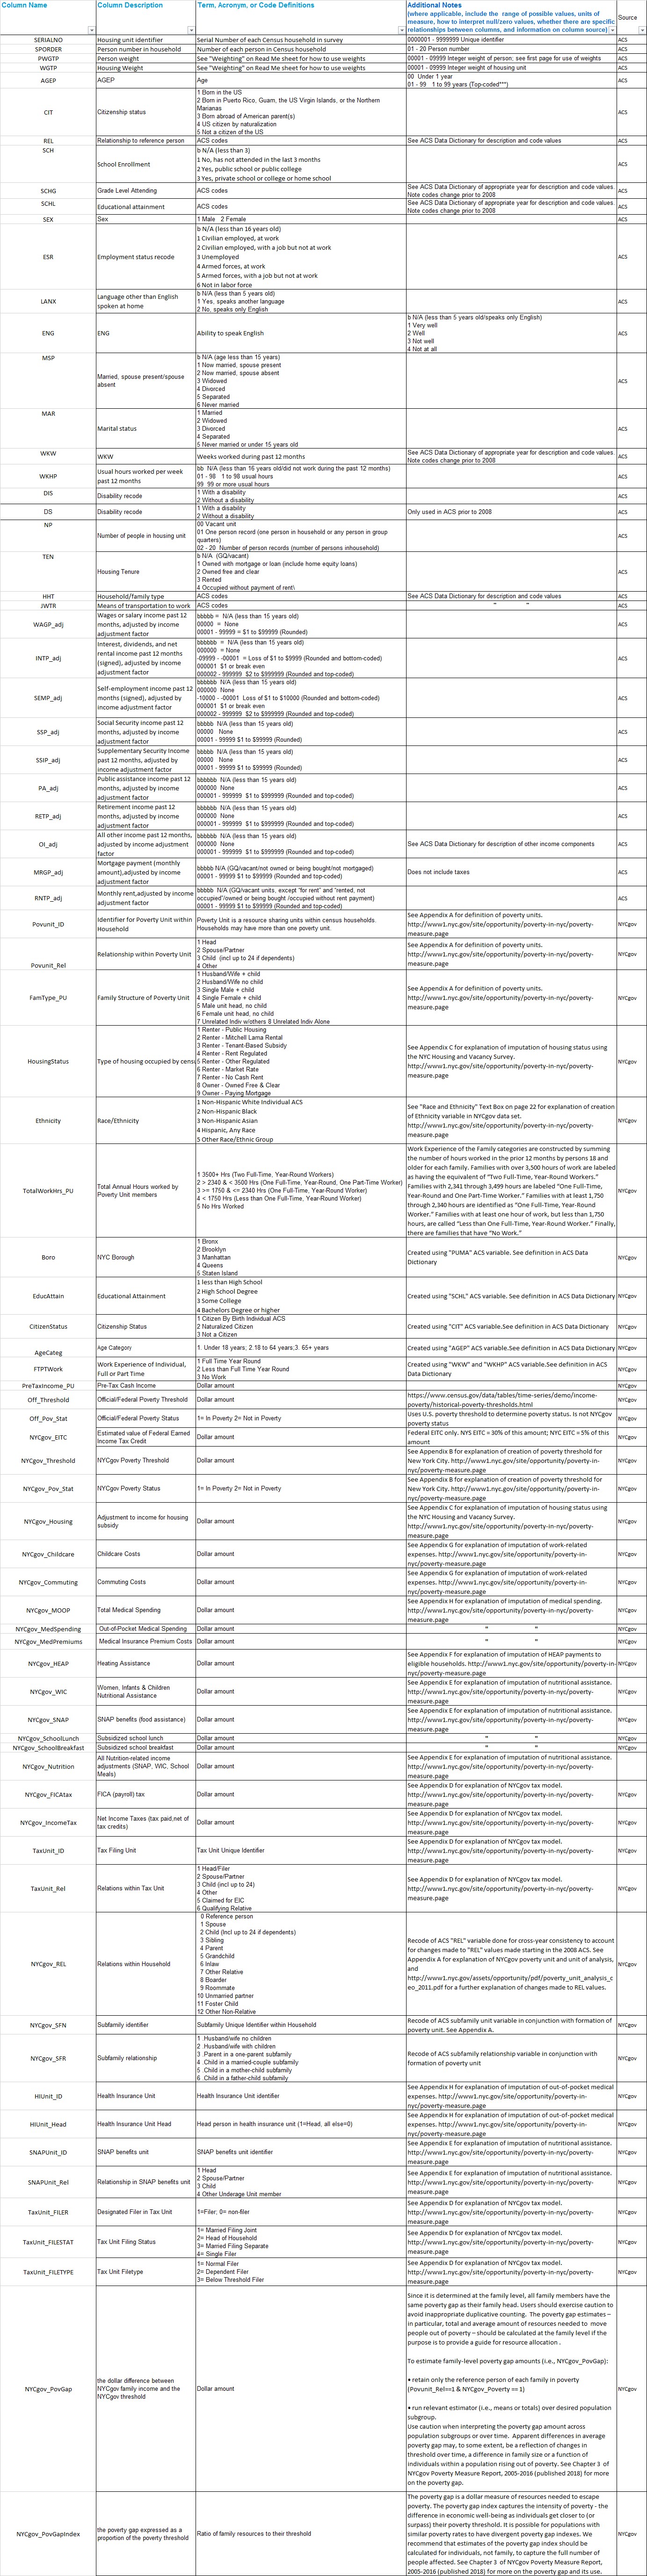

In [4]:
relevant =  ['NYCgov_Pov_Stat','AGEP','CIT','SCHL','SEX','ESR','LANX','ENG','MAR','WKHP','DIS','NP','TEN','MRGP_adj','RNTP_adj',
            'PreTaxIncome_PU','Ethnicity']
renamed = ['Above Poverty Line','Age','CIT','Educational Attainment','Female','ESR','LANX','ENG','MAR','Hours Worked/Week',
               'Disability','People in Unit','TEN','MRGP_adj','RNTP_adj','PreTaxIncome_PU','Ethnicity']

In [5]:
r_data = data[relevant]
r_data.columns = renamed

In [6]:
# Generating features from citizenship categories

r_data['Citizenship'] = 1
r_data['Citizenship'][r_data['CIT']==5] = 0

r_data.drop(columns=['CIT'],inplace=True)

In [7]:
# Translating sex into a binary 

r_data['Female'] = r_data['Female'] - 1 

In [8]:
# Generating features from employment categories

r_data['Unemployed'] = 0
r_data['Unemployed'][r_data['ESR']==3] = 1

r_data.drop(columns=['ESR'],inplace=True)

In [9]:
# Translating English at Home into a binary

r_data['English_Home'] = 0
r_data['English_Home'][r_data['LANX']==2] = 1

r_data.drop(columns=['LANX'],inplace=True)

In [10]:
# Generating features from language ability categories

r_data['Good_English'] = 0
r_data['Good_English'][r_data['ENG']==1] = 1
r_data['Good_English'][r_data['ENG']==2] = 1

r_data.drop(columns=['ENG'],inplace=True)

In [11]:
# Generating features from marriage categories

r_data['Ever_Married'] = 0
r_data['Ever_Married'][r_data['MAR']<5] = 1

r_data['Now_Married'] = 0
r_data['Now_Married'][r_data['MAR']==1] = 1

r_data.drop(columns=['MAR'],inplace=True)

In [12]:
# Filling in non-workers with 0 hours instead of NA

r_data['Hours Worked/Week'] = r_data['Hours Worked/Week'].fillna(0)

In [13]:
# Filling in no education with 0 instead of NA

r_data['Educational Attainment'] = r_data['Educational Attainment'].fillna(0) 

In [14]:
# Translating disability into a binary

r_data['Disability'] = r_data['Disability'] - 1

In [15]:
# Generating features from tenancy categories

r_data['Owned'] = 0
r_data['Owned'][r_data['TEN']==1] = 1
r_data['Owned'][r_data['TEN']==2] = 1

r_data.drop(columns=['TEN'],inplace=True)

In [16]:
# Generating features from rent and mortgage fields 

r_data['MRGP_adj'][r_data['MRGP_adj']=='bbbbb'] = 0
r_data['RNTP_adj'][r_data['RNTP_adj']=='bbbbb'] = 0
r_data['Housing_Cost'] = r_data['MRGP_adj'] + r_data['RNTP_adj'] 

r_data['Housing_Cost'] = r_data['Housing_Cost'].str.replace(',','')
r_data['Housing_Cost'] = r_data['Housing_Cost'].astype('float')

r_data['PreTaxIncome_PU'] = r_data['PreTaxIncome_PU'].str.replace(',','')
r_data['PreTaxIncome_PU'] = r_data['PreTaxIncome_PU'].astype('float')

r_data['Housing Burden'] = (r_data['Housing_Cost']+0.00000000000000000000000000000000001)/(r_data['PreTaxIncome_PU']+1)

r_data.drop(columns=['MRGP_adj','RNTP_adj','Housing_Cost','PreTaxIncome_PU'],inplace=True)

In [17]:
# Translating race categories into a binary

r_data['White'] = 0
r_data['White'][r_data['Ethnicity']==1] = 1

r_data.drop(columns=['Ethnicity'],inplace=True)

In [18]:
# Translating poverty status into a binary

r_data['Above Poverty Line'] = r_data['Above Poverty Line'] - 1

In [19]:
r_data.head()

,Above Poverty Line,Age,Educational Attainment,Female,Hours Worked/Week,Disability,People in Unit,Citizenship,Unemployed,English_Home,Good_English,Ever_Married,Now_Married,Owned,Housing Burden,White
0,1,51,18.0,0,0,0,1,1,0,0,1,0,0,0,0.029410,0
1,1,60,20.0,0,32,1,5,1,0,1,0,1,1,1,0.008287,1
2,1,52,16.0,1,40,1,5,1,0,1,0,1,1,1,0.008287,1
3,1,26,21.0,0,10,1,5,1,0,1,0,0,0,1,0.008287,1
4,1,20,16.0,0,40,1,5,1,0,1,0,0,0,1,0.008287,1


In [20]:
r_data.columns

Index(['Above Poverty Line', 'Age', 'Educational Attainment', 'Female',
       'Hours Worked/Week', 'Disability', 'People in Unit', 'Citizenship',
       'Unemployed', 'English_Home', 'Good_English', 'Ever_Married',
       'Now_Married', 'Owned', 'Housing Burden', 'White'],
      dtype='object')

In [21]:
label = ['Above Poverty Line']
features = ['Age','Educational Attainment','Female','Hours Worked/Week','Disability','People in Unit','Citizenship','Unemployed','English_Home',
            'Good_English','Ever_Married','Now_Married','Owned','Housing Burden','White']

In [22]:
r_data.groupby('Above Poverty Line').mean()

,Age,Educational Attainment,Female,Hours Worked/Week,Disability,People in Unit,Citizenship,Unemployed,English_Home,Good_English,Ever_Married,Now_Married,Owned,Housing Burden,White
Above Poverty Line,,,,,,,,,,,,,,,
0,38.930293,13.820292,0.564026,10.83512,0.827061,3.574422,0.783625,0.056733,0.385124,0.375856,0.453461,0.283423,0.253767,113.184600,0.259650
1,39.631671,15.759616,0.525954,22.39166,0.893998,3.617729,0.864960,0.027545,0.524549,0.327963,0.511372,0.380172,0.482475,0.019323,0.382947


In [23]:
y_data = r_data[label]
x_data = r_data[features]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [25]:
print(y_train.mean())
print(y_test.mean())

Above Poverty Line    0.819102
dtype: float64
Above Poverty Line    0.819725
dtype: float64


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
logreg.score(X_test, y_test)

0.88462378905965477

In [28]:
import statsmodels.api as sm
logit_model=sm.Logit(y_data,x_data)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.308644
         Iterations 18
                              Results: Logit
Model:                 Logit                No. Iterations:     18.0000   
Dependent Variable:    Above Poverty Line   Pseudo R-squared:   0.347     
Date:                  2018-10-01 15:28     AIC:                42403.1258
No. Observations:      68644                BIC:                42540.1761
Df Model:              14                   Log-Likelihood:     -21187.   
Df Residuals:          68629                LL-Null:            -32439.   
Converged:             1.0000               Scale:              1.0000    
--------------------------------------------------------------------------
                        Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
Age                      0.0021   0.0008   2.7424 0.0061   0.0006   0.0036
Educational Attainment   0.

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [30]:
def baseline_model():
    # Create model
    model = Sequential()
    model.add(Dense(13, input_dim=15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [32]:
# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Standardize
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)

# Evaluate 
kfold = KFold(n_splits=5, random_state=seed)
results_baseline = cross_val_score(pipeline, x_data, y_data, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results_baseline.mean(), results_baseline.std()))

pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)
accuracy1 = accuracy_score(y_test, prediction.round())
print('Accuracy: ',accuracy1)

Results: -0.13 (0.00) MSE
Accuracy:  0.834583727875


In [33]:
def deeper_model():
    # Create model
    model = Sequential()
    model.add(Dense(13, input_dim=15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model 

In [34]:
# Fix random seed for reproducibility
np.random.seed(seed)

# Standardize
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=deeper_model, epochs=10, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)

# Evaluate
kfold = KFold(n_splits=5, random_state=seed)
results_deeper = cross_val_score(pipeline, x_data, y_data, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results_deeper.mean(), results_deeper.std()))

pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)
accuracy2 = accuracy_score(y_test, prediction.round())
print('Accuracy: ',accuracy2)

Results: -0.13 (0.00) MSE
Accuracy:  0.83349115012


In [35]:
# Define wider model
def wider_model():
    # Create model
    model = Sequential()
    model.add(Dense(20, input_dim=15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [36]:
# Fix random seed for reproducibility
np.random.seed(seed)

# Standardize
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=10, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)

# Evaluate
kfold = KFold(n_splits=5, random_state=seed)
results_wider = cross_val_score(pipeline, x_data, y_data, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results_wider.mean(), results_wider.std()))

pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)
accuracy3 = accuracy_score(y_test, prediction.round())
print('Accuracy: ',accuracy3)

Results: -0.13 (0.00) MSE
Accuracy:  0.835166436011
